# 빅데이터와 금융자료 분석 CH1

In [1]:
import numpy as np
import pandas as pd

In [2]:
missdict = {'f1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'f2': [10., None, 20., 30., None, 50., 60., 70., 80., 90.],
            'f3': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C']}
missdata = pd.DataFrame( missdict )
missdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      10 non-null     int64  
 1   f2      8 non-null      float64
 2   f3      10 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [3]:
missdata.isna().mean()

f1    0.0
f2    0.2
f3    0.0
dtype: float64

In [4]:
tmpdata1 = missdata.dropna()
tmpdata1

,f1,f2,f3
0,1,10.0,A
2,3,20.0,A
3,4,30.0,A
5,6,50.0,B
6,7,60.0,B
7,8,70.0,B
8,9,80.0,C
9,10,90.0,C


In [5]:
tmpdata2 = missdata.dropna( subset=['f3'] )
tmpdata2

,f1,f2,f3
0,1,10.0,A
1,2,NaN,A
2,3,20.0,A
3,4,30.0,A
4,5,NaN,B
5,6,50.0,B
6,7,60.0,B
7,8,70.0,B
8,9,80.0,C
9,10,90.0,C


In [6]:
numdata = missdata.select_dtypes(include=['int64', 'float64'])
tmpdata3 = numdata.fillna( -999, inplace=False )
tmpdata3.describe()

,f1,f2
count,10.00000,10.000000
mean,5.50000,-158.800000
std,3.02765,443.562297
min,1.00000,-999.000000
25%,3.25000,12.500000
50%,5.50000,40.000000
75%,7.75000,67.500000
max,10.00000,90.000000


In [7]:
numdata.mean()

f1     5.50
f2    51.25
dtype: float64

In [8]:
tmpdata4 = numdata.fillna( numdata.mean(), inplace=False )
tmpdata4

,f1,f2
0,1,10.00
1,2,51.25
2,3,20.00
3,4,30.00
4,5,51.25
5,6,50.00
6,7,60.00
7,8,70.00
8,9,80.00
9,10,90.00


In [9]:
missdata.groupby('f3')['f2'].mean()

f3
A    20.0
B    60.0
C    85.0
Name: f2, dtype: float64

In [10]:
missdata.groupby('f3')['f2'].transform('mean')

0    20.0
1    20.0
2    20.0
3    20.0
4    60.0
5    60.0
6    60.0
7    60.0
8    85.0
9    85.0
Name: f2, dtype: float64

In [11]:
tmpdata5 = numdata.copy()
tmpdata5['f2'].fillna( missdata.groupby('f3')['f2'].transform('mean'), inplace=True)
tmpdata5

/var/folders/n2/jbh_0_091bx8qgz7j87t2qwc0000gp/T/ipykernel_25894/622840210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmpdata5['f2'].fillna( missdata.groupby('f3')['f2'].transform('mean'),inplace=True)


,f1,f2
0,1,10.0
1,2,20.0
2,3,20.0
3,4,30.0
4,5,60.0
5,6,50.0
6,7,60.0
7,8,70.0
8,9,80.0
9,10,90.0


In [12]:
missdata_tr = missdata.dropna()
x_tr = missdata_tr[['f1']]
y_tr = missdata_tr['f2']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit( x_tr, y_tr )

missdata_ts = missdata [ missdata.isnull().any(axis=1) ]
x_ts = missdata_ts[['f1']]

predicted_values = model.predict( x_ts )
tmpdata6 = missdata.copy()
tmpdata6.loc[ tmpdata6['f2'].isnull(), 'f2'] = predicted_values
tmpdata6

,f1,f2,f3
0,1,10.000000,A
1,2,14.191176,A
2,3,20.000000,A
3,4,30.000000,A
4,5,41.985294,B
5,6,50.000000,B
6,7,60.000000,B
7,8,70.000000,B
8,9,80.000000,C
9,10,90.000000,C


In [13]:
missdata_num = missdata.copy()
missdata_num['f3']=missdata_num['f3'].map({'A':1,'B':2,'C':3})

In [14]:
missdata_num

,f1,f2,f3
0,1,10.0,1
1,2,NaN,1
2,3,20.0,1
3,4,30.0,1
4,5,NaN,2
5,6,50.0,2
6,7,60.0,2
7,8,70.0,2
8,9,80.0,3
9,10,90.0,3


In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
tmpdata7 = imputer.fit_transform(missdata_num)

In [16]:
pd.DataFrame( tmpdata7 )

,0,1,2
0,1.0,10.0,1.0
1,2.0,15.0,1.0
2,3.0,20.0,1.0
3,4.0,30.0,1.0
4,5.0,40.0,2.0
5,6.0,50.0,2.0
6,7.0,60.0,2.0
7,8.0,70.0,2.0
8,9.0,80.0,3.0
9,10.0,90.0,3.0


In [17]:
outdict = {'A': [10, 0.02, 0.3, 40, 50, 60, 712, 80, 90, 1003],
           'B': [0.05, 0.00015, 25, 35, 45, 205, 65, 75, 85, 3905]}
outdata = pd.DataFrame( outdict )

Q1 = outdata.quantile(0.25)
Q3 = outdata.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

((outdata < lower_bound) | (outdata > upper_bound))

,A,B
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True
6,True,False
7,False,False
8,False,False
9,True,True


In [18]:
outliers = ((outdata < lower_bound) | (outdata > upper_bound)).any(axis=1)
outliersdata = outdata[ outliers ]
outliersdata

,A,B
5,60.0,205.0
6,712.0,65.0
9,1003.0,3905.0


In [19]:
standardizeddata = (outdata - outdata.mean()) / outdata.std()
standardizeddata

,A,B
0,-0.552206,-0.364647
1,-0.580536,-0.364688
2,-0.579741,-0.344154
3,-0.467047,-0.335940
4,-0.438661,-0.327727
5,-0.410274,-0.196309
6,1.440519,-0.311300
7,-0.353501,-0.303086
8,-0.325115,-0.294872
9,2.266563,2.842723


In [20]:
outliers2 = ((standardizeddata < -3) | (standardizeddata > 3)).any(axis=1)
outliersdata2 = outdata[ outliers2 ]
outliersdata2

,A,B


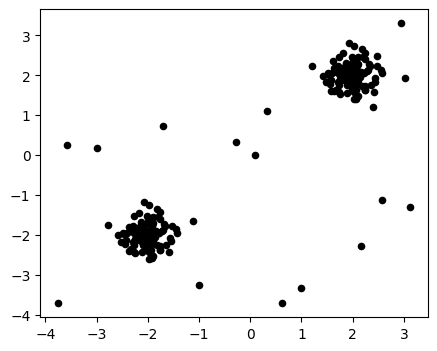

In [21]:
import matplotlib.pyplot as plt
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers + 2, X_inliers - 2, X_outliers]

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], color='k', s=20)

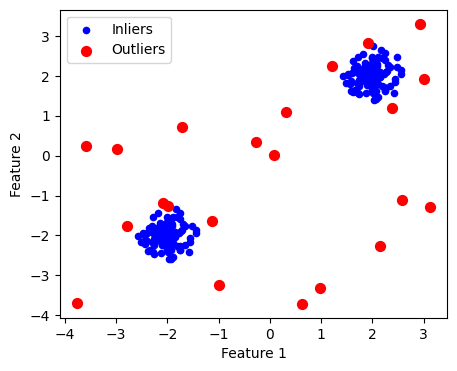

In [22]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X) # 1: inlier, -1: outlier
outlier_mask = y_pred == -1

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, label='Inliers')
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], color='r', s=50,label='Outliers')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

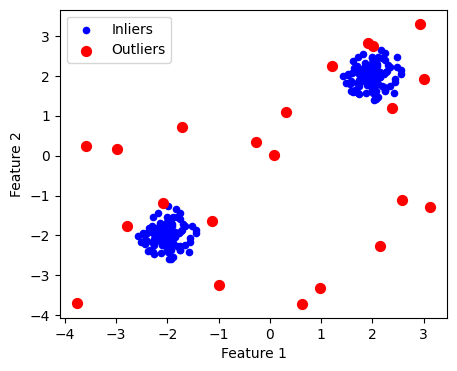

In [23]:
from sklearn.ensemble import IsolationForest
clf2 = IsolationForest(contamination=0.1)
# contamination : 이상치 비율
# n_estimators : 나무의 갯수 (defalut 100)
# max_features : 각 나무별 특성변수의 갯수(default 1)
clf2.fit( X )
y_pred2 = clf2.predict( X ) # 1: inlier, -1: outlier
outlier_mask2 = y_pred2 == -1

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, label='Inliers')
plt.scatter(X[outlier_mask2, 0], X[outlier_mask2, 1], color='r', s=50,label='Outliers')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

In [25]:
clf2.score_samples(X)

array([-0.39567479, -0.43973362, -0.38576701, -0.4625295 , -0.39169087,
       -0.39353101, -0.44632054, -0.4539587 , -0.39410011, -0.42823486,
       -0.43802322, -0.4231585 , -0.38600184, -0.40324911, -0.38778406,
       -0.46849881, -0.4075734 , -0.43420431, -0.45140279, -0.4113938 ,
       -0.40036102, -0.38335266, -0.42666089, -0.41104579, -0.44476313,
       -0.38744281, -0.39942914, -0.44257912, -0.38938554, -0.40470075,
       -0.39006555, -0.42881353, -0.44275864, -0.40154039, -0.39729665,
       -0.42434279, -0.42743206, -0.57699503, -0.38628797, -0.45454533,
       -0.3864026 , -0.44513991, -0.39598029, -0.41231495, -0.39270763,
       -0.40568073, -0.39005843, -0.43210962, -0.38601781, -0.38485125,
       -0.41991455, -0.40181793, -0.38788591, -0.48400217, -0.38538727,
       -0.47693547, -0.50815903, -0.39115267, -0.40423505, -0.43216634,
       -0.4254748 , -0.48475901, -0.4890737 , -0.40357175, -0.39439224,
       -0.42406868, -0.40171635, -0.44870204, -0.38761922, -0.43